In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from constants import *  # relevant constants!
from particle import *   # free particle class def and some routines
from solid_body import *  # solid body (Pan) routines
from free_particle_forces import *  # routines for calculating accelerations on free particles

%load_ext autoreload
%autoreload 2

# I have checked that these routines read in okay without errors

In [2]:
# given a mass and a density compute the radius of a sphere
def rad_from_density(mass,rho):
    z = 3.0*mass/(rho*4.0*np.pi)
    radius = z**(1.0/3.0)
    return radius

# routine to display all particles in a solid body in the xy plane
# arguments are a figure and axes for the figure
def display_stuck(fig,ax,solid_body):
    n = len(solid_body.stuck_particles)
    for i in range(0,n):
        x = solid_body.stuck_particles[i].x
        y = solid_body.stuck_particles[i].y
        rad = solid_body.stuck_particles[i].radius
        circle1=plt.Circle((x, y),rad, color='red')
        ax.add_artist(circle1)
    return

# routine to display a free particles in the xy plane
# arguments are a figure and axes for the figure
def display_free(fig,ax,free_particle):
    x = free_particle.x
    y = free_particle.y
    rad = free_particle.radius
    circle1=plt.Circle((x, y),rad, color='blue')
    ax.add_artist(circle1)
    

In [3]:
# check that we can create a free particle
vx,vy,vz = 0,0,0
x,y,z = 2*r_Hill_Pan,0,0
mass = mass_Pan/1e3
radius = rad_from_density(mass,1e3)  # a density of 1e3 kg/m3 is 1g/cc 
f1 = free_particle(mass,radius,x,y,z,vx,vy,vz) 
# success on creating a free particle!

In [4]:
print(radius)

1057.236617473416


In [5]:
# check that we can create a stuck particle
first_particle = stuck_particle(mass_Pan,1e3,0,0,0)
# success!

In [6]:
# check that we can create a solid_body central particle
Pan = Psolid_body(mass_Pan,R_polar_Pan)
# success!

In [7]:
print(R_polar_Pan)

10400.0


In [13]:
# check that we can add a particle to the solid body
Pan.add_particle(mass_Pan/1e3,R_polar_Pan/10,R_polar_Pan*1.1,R_polar_Pan*1.1,0)
# success

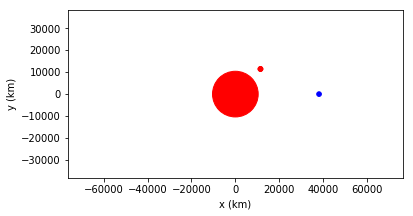

In [14]:
# plot free and solid particles on the xy plane
fig, ax = plt.subplots()
ax.set_xlim(-4*r_Hill_Pan,4*r_Hill_Pan)
ax.set_ylim(-2*r_Hill_Pan,2*r_Hill_Pan)
ax.set_aspect(1.0)
ax.set_xlabel('x (km)')
ax.set_ylabel('y (km)')
display_free(fig,ax,f1)  # display free particle
display_stuck(fig,ax,Pan)  # display the solid body particles too
# success

In [10]:
print(r_Hill_Pan)

19057.088015120575


In [11]:
Coriolis_force(f1)

In [16]:
dt = 0.1
integrate_free(f1,Pan,dt,1)

/Users/aquillen/Desktop/phy256cmpphys/pylab/try/free_particle_forces.py:33: RuntimeWarning: divide by zero encountered in double_scalars
  fac *= 1/rad**3
/Users/aquillen/Desktop/phy256cmpphys/pylab/try/free_particle_forces.py:34: RuntimeWarning: invalid value encountered in double_scalars
  particle.ax += fac*dx
/Users/aquillen/Desktop/phy256cmpphys/pylab/try/free_particle_forces.py:35: RuntimeWarning: invalid value encountered in double_scalars
  particle.ay += fac*dy
/Users/aquillen/Desktop/phy256cmpphys/pylab/try/free_particle_forces.py:36: RuntimeWarning: invalid value encountered in double_scalars
  particle.az += fac*dz


AttributeError: 'free_particle' object has no attribute 'vz'